In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pl.read_csv(r'ex2.csv')

In [4]:
columns = data.columns
n = len(columns)-1
m  = len(data)
x = data.select(columns[:n])
y = data.select(columns[-1])

Text(0.5, 1.0, 'Function')

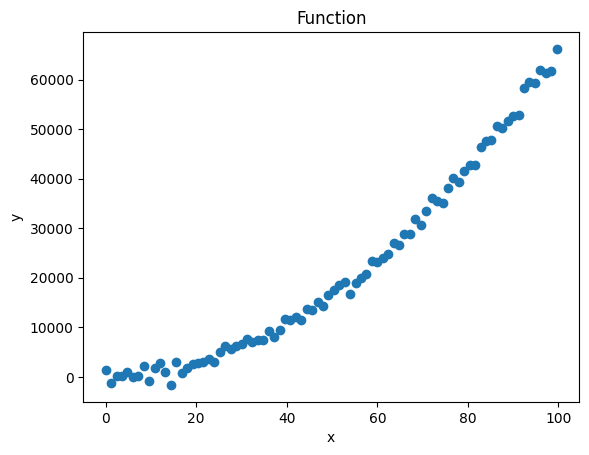

In [5]:
# Create a figure and a set of subplots
fig, axs = plt.subplots()

# Plot the line and (x, y) on the second subplot
axs.scatter(x, y)
axs.set_xlabel('x')
axs.set_ylabel('y')
axs.set_title('Function')

In [30]:
x_new = x.with_columns((pl.col("x") ** 2).alias("x_squared"))
columns = x_new.columns
n = len(columns)
mean_x = x_new.mean()
std_x = x_new.std()
mean_y = y.mean()
std_y = y.std()
standardized_x = x_new.with_columns([(pl.col(col) - mean_x[col]) / std_x[col] for col in columns[:n]])
standardized_y = (y - mean_y[y.columns[0]]) / std_y[y.columns[0]]
standardized_x = standardized_x.with_columns(pl.lit(1).alias("constant"))
standardized_x = standardized_x.select(["constant"] + [col for col in standardized_x.columns if col != "constant"])
x_mat = standardized_x.to_numpy().reshape(-1, n+1)
y_mat = standardized_y.to_numpy().reshape(-1, 1)

[[3.44974548e-16]
 [2.17265545e-02]
 [9.76444310e-01]]


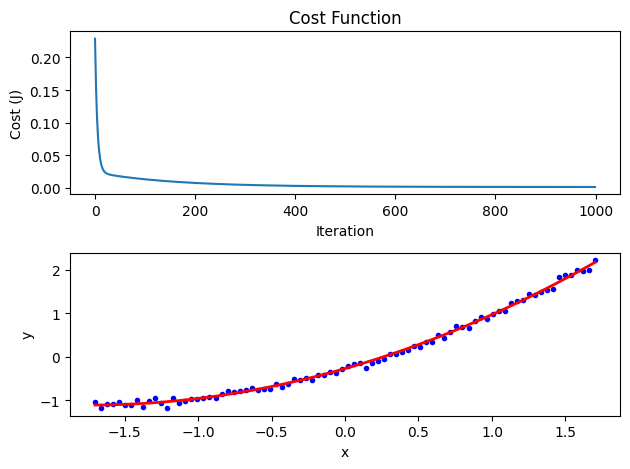

In [87]:
theta = np.random.rand(n+1, 1)
H = np.matmul(x_mat, theta)
alpha = 0.1
loop = 1000
J_values = np.zeros((loop, 1))
for i in range(loop):
    theta = theta - (alpha/m)*np.matmul(x_mat.T, (H-y_mat))
    H = np.matmul(x_mat, theta)
    J_values[i] = (1/(2*m))*np.matmul((H-y_mat).T, (H-y_mat))
print(theta)
# Create a figure and a set of subplots
fig, axs = plt.subplots(2)
# Plot the cost function on the first subplot
axs[0].plot(J_values)
axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Cost (J)')
axs[0].set_title('Cost Function')

x_line = np.linspace(x['x'].min(), x['x'].max(), loop).reshape(loop, 1)
x_square_line = np.concatenate((x_line, x_line**2), 1)
x_line_poly = (x_square_line-mean_x)/std_x
x_line_poly = np.hstack((np.ones((x_line.shape[0], 1)), x_line_poly))
y_new = np.matmul(x_line_poly, theta)

axs[1].plot(standardized_x['x'], standardized_y, "b.")
axs[1].plot(x_line_poly[:, 1], y_new, "r-", linewidth = 2, label ="Predictions")
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Layout so plots do not overlap
fig.tight_layout()